In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from datetime import timedelta

from utils import *

* Information on functions can be found in utils.py

In [35]:
FILES = ('../data/tuesday.csv', 
         '../data/monday.csv', 
         '../data/thursday.csv', 
         '../data/wednesday.csv', 
         '../data/friday.csv'
)

df = load_and_combining(FILES)
df

../data/tuesday.csv
../data/monday.csv
../data/thursday.csv
../data/wednesday.csv
../data/friday.csv


,timestamp,new_id,location,shifted
0,2019-09-02 07:02:00,2_1,entrance,dairy
1,2019-09-02 07:03:00,2_1,dairy,dairy
2,2019-09-02 07:04:00,2_1,dairy,checkout
3,2019-09-02 07:05:00,2_1,checkout,checkout
0,2019-09-02 07:05:00,2_10,entrance,fruit
...,...,...,...,...
6,2019-09-06 17:23:00,6_999,fruit,drinks
7,2019-09-06 17:24:00,6_999,drinks,fruit
8,2019-09-06 17:25:00,6_999,fruit,fruit
9,2019-09-06 17:26:00,6_999,fruit,checkout


* Following one customer's journey

In [36]:
df.loc[df['new_id']=='2_1']

,timestamp,new_id,location,shifted
0,2019-09-02 07:02:00,2_1,entrance,dairy
1,2019-09-02 07:03:00,2_1,dairy,dairy
2,2019-09-02 07:04:00,2_1,dairy,checkout
3,2019-09-02 07:05:00,2_1,checkout,checkout


In [37]:
df['day'] = df['timestamp'].dt.day

In [38]:
total_customers = df.groupby('location')['new_id'].nunique()
print('Total number of customers in each section across all days:')
print(total_customers)

Total number of customers in each section across all days:
location
checkout    7445
dairy       3818
drinks      3214
entrance    7445
fruit       4284
spices      2938
Name: new_id, dtype: int64


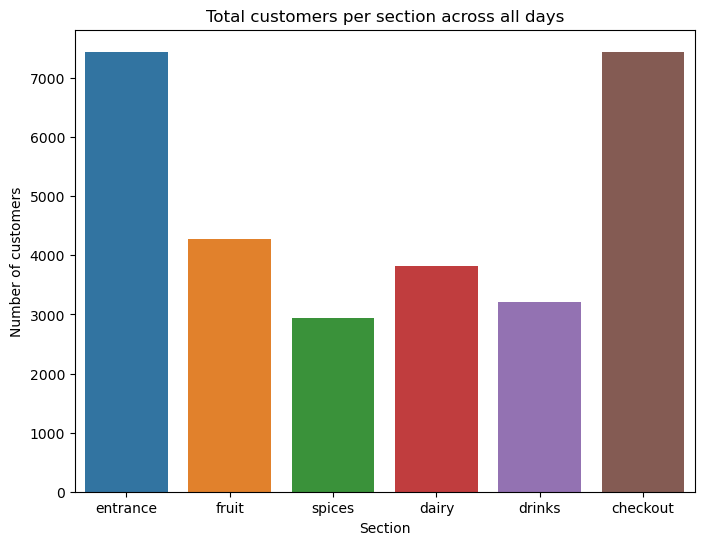

In [39]:
location_order = ['entrance', 'fruit', 'spices', 'dairy', 'drinks', 'checkout']

plt.figure(figsize=(8, 6))
sns.barplot(x=total_customers.index, y=total_customers.values, order=location_order)
plt.title('Total customers per section across all days')
plt.xlabel('Section')
plt.ylabel('Number of customers')
plt.show()

<AxesSubplot:xlabel='day', ylabel='count'>

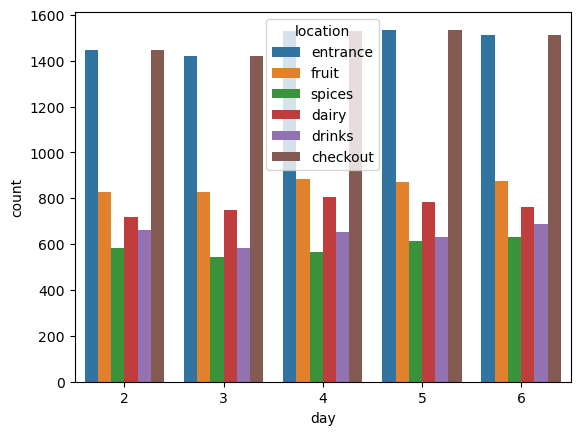

In [101]:
# Customers by each section on each day
day_order = ['monday','tuesday','wednesday','thursday','friday']
daily_sections = df.groupby(['day','location'])['new_id'].nunique().reset_index(name='count')
sns.barplot(x='day', y='count', data = daily_sections, hue='location', hue_order=location_order)


In [41]:
# Calculate the total number of customers in each section over time
df.groupby(['location','timestamp'])['new_id'].count()

location  timestamp          
checkout  2019-09-02 07:05:00    2
          2019-09-02 07:06:00    2
          2019-09-02 07:07:00    1
          2019-09-02 07:08:00    3
          2019-09-02 07:09:00    1
                                ..
spices    2019-09-06 21:43:00    1
          2019-09-06 21:44:00    1
          2019-09-06 21:45:00    1
          2019-09-06 21:49:00    1
          2019-09-06 21:50:00    2
Name: new_id, Length: 21437, dtype: int64

In [42]:
# Display the number of customers at checkout over time
df[df['location'] == 'checkout'].groupby('timestamp')[['new_id']].count()

,new_id
timestamp,
2019-09-02 07:05:00,2
2019-09-02 07:06:00,2
2019-09-02 07:07:00,1
2019-09-02 07:08:00,3
2019-09-02 07:09:00,1
...,...
2019-09-06 21:45:00,1
2019-09-06 21:47:00,2
2019-09-06 21:48:00,2


In [43]:
# Calculate the time each customer spent in the market
df.groupby(['new_id'])['timestamp'].apply(lambda x: x.max() - x.min())

new_id
2_1      0 days 00:03:00
2_10     0 days 00:03:00
2_100    0 days 00:08:00
2_1000   0 days 00:08:00
2_1001   0 days 00:02:00
               ...      
6_995    0 days 00:02:00
6_996    0 days 00:07:00
6_997    0 days 00:14:00
6_998    0 days 00:06:00
6_999    0 days 00:10:00
Name: timestamp, Length: 7445, dtype: timedelta64[ns]

In [44]:
# Creating time column in order to group everyone together differently
df['time'] = df['timestamp'].dt.strftime('%H:%M')

In [45]:
df

,timestamp,new_id,location,shifted,day,time
0,2019-09-02 07:02:00,2_1,entrance,dairy,2,07:02
1,2019-09-02 07:03:00,2_1,dairy,dairy,2,07:03
2,2019-09-02 07:04:00,2_1,dairy,checkout,2,07:04
3,2019-09-02 07:05:00,2_1,checkout,checkout,2,07:05
0,2019-09-02 07:05:00,2_10,entrance,fruit,2,07:05
...,...,...,...,...,...,...
6,2019-09-06 17:23:00,6_999,fruit,drinks,6,17:23
7,2019-09-06 17:24:00,6_999,drinks,fruit,6,17:24
8,2019-09-06 17:25:00,6_999,fruit,fruit,6,17:25
9,2019-09-06 17:26:00,6_999,fruit,checkout,6,17:26


Mean time spent in the market: 7.25 minutes
Median time spent in the market: 5.00 minutes


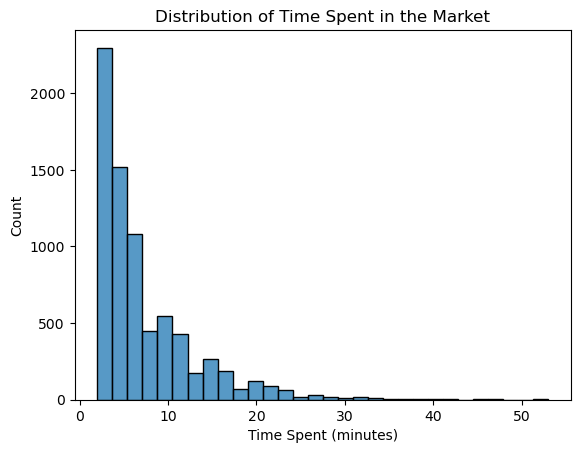

In [46]:
# Calculate the time each customer spent in the market
customer_times = df.groupby('new_id')['timestamp'].apply(lambda x: x.max() - x.min())
customer_times = customer_times.dt.total_seconds() / 60 # dt stands for datetime
# Display the results
print('Mean time spent in the market: {:.2f} minutes'.format(customer_times.mean()))
print('Median time spent in the market: {:.2f} minutes'.format(customer_times.median()))

# Plot a histogram of the customer times
sns.histplot(data=customer_times, bins=30)
plt.title('Distribution of Time Spent in the Market')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Count')
plt.show()

### Creating new DataFrames for counting the average number of customers in each section for each minute of the day. 

* This is used in creating the customer tracking gif.

In [47]:
avg_cust_section = df[df.location != 'entrance']

In [48]:
df

,timestamp,new_id,location,shifted,day,time
0,2019-09-02 07:02:00,2_1,entrance,dairy,2,07:02
1,2019-09-02 07:03:00,2_1,dairy,dairy,2,07:03
2,2019-09-02 07:04:00,2_1,dairy,checkout,2,07:04
3,2019-09-02 07:05:00,2_1,checkout,checkout,2,07:05
0,2019-09-02 07:05:00,2_10,entrance,fruit,2,07:05
...,...,...,...,...,...,...
6,2019-09-06 17:23:00,6_999,fruit,drinks,6,17:23
7,2019-09-06 17:24:00,6_999,drinks,fruit,6,17:24
8,2019-09-06 17:25:00,6_999,fruit,fruit,6,17:25
9,2019-09-06 17:26:00,6_999,fruit,checkout,6,17:26


In [49]:
avg_cust_section = avg_cust_section.groupby(['time','location'])[['new_id']].count()/5
avg_cust_section.reset_index(inplace=True)
avg_cust_section.set_index('time',inplace=True)

In [50]:
avg_cust_section.to_csv('../data/average_cust_per_section.csv')

In [51]:
avg_cust_section

,location,new_id
time,,
07:00,dairy,0.6
07:00,drinks,0.6
07:00,fruit,0.8
07:01,checkout,0.4
07:01,dairy,1.2
...,...,...
21:50,dairy,2.8
21:50,drinks,0.4
21:50,fruit,1.4


In [57]:
# estimate the total revenue for a customer
revenue_per_minute = {'fruit': 4, 'spices': 3, 'dairy': 5, 'drinks': 6}
df['revenue_per_minute'] = df['location'].map(revenue_per_minute)
customer_revenue = df.groupby('new_id')['revenue_per_minute'].sum() * (customer_times / 60)

# determine the most profitable section
revenue_by_section = df.groupby('location')['revenue_per_minute'].sum()
most_profitable_section = revenue_by_section.idxmax()

print(f"The most profitable section is {most_profitable_section} with total revenue of {revenue_by_section[most_profitable_section]}€.")


The most profitable section is dairy with total revenue of 88975.0€.


### Now we calculate the probability that a customer will enter at any given minute during the day.

In [58]:
entrance = df.loc[df['location']=='entrance']

In [59]:
entrance

,timestamp,new_id,location,shifted,day,time,revenue_per_minute
0,2019-09-02 07:02:00,2_1,entrance,dairy,2,07:02,NaN
0,2019-09-02 07:05:00,2_10,entrance,fruit,2,07:05,NaN
0,2019-09-02 07:55:00,2_100,entrance,drinks,2,07:55,NaN
0,2019-09-02 17:43:00,2_1000,entrance,dairy,2,17:43,NaN
0,2019-09-02 17:44:00,2_1001,entrance,fruit,2,17:44,NaN
...,...,...,...,...,...,...,...
0,2019-09-06 17:16:00,6_995,entrance,spices,6,17:16,NaN
0,2019-09-06 17:16:00,6_996,entrance,spices,6,17:16,NaN
0,2019-09-06 17:17:00,6_997,entrance,fruit,6,17:17,NaN
0,2019-09-06 17:17:00,6_998,entrance,drinks,6,17:17,NaN


In [60]:
# Calculate the total number of customers in the supermarket over time.
cust_times = entrance.groupby(['time'])['new_id'].count().reset_index()

In [61]:
cust_times

,time,new_id
0,06:59,10
1,07:00,6
2,07:01,4
3,07:02,12
4,07:03,10
...,...,...
869,21:45,9
870,21:46,5
871,21:47,9
872,21:48,1


In [62]:
cust_times.set_index('time',inplace=True)

In [63]:
cust_times['new_id'].sum()

7445

In [64]:
# value at each time divided by len of list
cust_times['probability'] = cust_times['new_id']/cust_times['new_id'].sum()

## This data is used in building the grocery store simulation.

In [65]:
cust_times

,new_id,probability
time,,
06:59,10,0.001343
07:00,6,0.000806
07:01,4,0.000537
07:02,12,0.001612
07:03,10,0.001343
...,...,...
21:45,9,0.001209
21:46,5,0.000672
21:47,9,0.001209


In [66]:
cust_times['probability'].sum()

1.0

In [67]:
#cust_times.to_csv('../data/cust_times.csv')

# Here we find the probability matrix for customer travel.
 
* I.E. what is the chance that given a customer's current location, what is the chance that they will go to another section.

In [68]:
probabilities = pd.crosstab(df['location'], df['shifted'], normalize=0)

In [69]:
probabilities

shifted,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103344,0.737061,0.058500,0.049789,0.051307
drinks,0.215688,0.010898,0.598540,0.087900,0.086974
entrance,0.000000,0.287576,0.153526,0.377435,0.181464
fruit,0.201447,0.095848,0.054804,0.597264,0.050637
spices,0.150565,0.193061,0.162979,0.090880,0.402515


In [ ]:
#probabilities.to_csv('../data/probabilities.csv')